In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## 1. Read in Data

In [31]:
bigfoot_df = pd.read_csv('bfro_reports_geocoded.csv')
bigfoot_df.head()

,index,observed,location_details,county,state,season,title,latitude,longitude,date,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,...,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Inspect Data Types

In [32]:
bigfoot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5021 non-null   int64  
 1   observed            4983 non-null   object 
 2   location_details    4260 non-null   object 
 3   county              5021 non-null   object 
 4   state               5021 non-null   object 
 5   season              5021 non-null   object 
 6   title               4045 non-null   object 
 7   latitude            4045 non-null   float64
 8   longitude           4045 non-null   float64
 9   date                4045 non-null   object 
 10  number              5021 non-null   float64
 11  classification      5021 non-null   object 
 12  geohash             4045 non-null   object 
 13  temperature_high    3338 non-null   float64
 14  temperature_mid     3186 non-null   float64
 15  temperature_low     3189 non-null   float64
 16  dew_po

In [33]:
# Change 'date' column to DateTime
bigfoot_df['date'] = pd.to_datetime(bigfoot_df['date'])

# Change 'number' (report number) int based on structures described in data dictionary on kaggle
    # NOTE: data dictionary doesnt always match up w actual dataset
bigfoot_df['number'] = bigfoot_df['number'].astype('int64')

bigfoot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               5021 non-null   int64         
 1   observed            4983 non-null   object        
 2   location_details    4260 non-null   object        
 3   county              5021 non-null   object        
 4   state               5021 non-null   object        
 5   season              5021 non-null   object        
 6   title               4045 non-null   object        
 7   latitude            4045 non-null   float64       
 8   longitude           4045 non-null   float64       
 9   date                4045 non-null   datetime64[ns]
 10  number              5021 non-null   int64         
 11  classification      5021 non-null   object        
 12  geohash             4045 non-null   object        
 13  temperature_high    3338 non-null   float64     

In [34]:
bigfoot_df.head()

,index,observed,location_details,county,state,season,title,latitude,longitude,date,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,...,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Handle NA values.

To start, we decided to take a look at the data dictionary to discover any columns that wouldn't be helpful in our data analysis. Right off the bat, "observed" and "title" are two columns that don't make sense for our analysis.

In [35]:
# Count how many NA values there are for each column
values_count = bigfoot_df.count()

# Count how many NAs are included for each variable
na_count = bigfoot_df.isna().sum()

# Create a summary dataframe of counts vs NAs
summary_missing_values = pd.DataFrame({
    'Value Count': values_count,
    'NA Count': na_count
})

summary_missing_values

,Value Count,NA Count
index,5021,0
observed,4983,38
location_details,4260,761
county,5021,0
state,5021,0
season,5021,0
title,4045,976
latitude,4045,976
longitude,4045,976
date,4045,976


In [36]:
# drop columns we don't need
bigfoot_df = bigfoot_df.drop("precip_type", axis='columns')
bigfoot_df = bigfoot_df.drop("pressure", axis='columns')
bigfoot_df = bigfoot_df.drop("location_details", axis='columns')


# drop columns missing latitude, longitude, date, and geohash
bigfoot_df = bigfoot_df.dropna(subset=['latitude', 'longitude', 'date'])

In [37]:
# Recreate the summary NA table

values_count = bigfoot_df.count()
na_count = bigfoot_df.isna().sum()
summary_missing_values_2 = pd.DataFrame({
    'Value Count': values_count,
    'NA Count': na_count
})

summary_missing_values_2

,Value Count,NA Count
index,4045,0
observed,4012,33
county,4045,0
state,4045,0
season,4045,0
title,4045,0
latitude,4045,0
longitude,4045,0
date,4045,0
number,4045,0


## 4. Examine summary statistics for variables of interest. 


In [38]:
summary_stats = bigfoot_df.describe().round(2).T
summary_stats

,count,mean,min,25%,50%,75%,max,std
index,4045.0,2549.54,2.0,1316.0,2570.0,3823.0,5015.0,1444.72
latitude,4045.0,39.36,25.14,35.35,39.3,43.93,64.89,5.68
longitude,4045.0,-97.42,-167.13,-117.06,-91.77,-83.07,-68.23,16.73
date,4045,1999-06-22 13:15:17.577255936,1869-11-10 00:00:00,1990-09-15 00:00:00,2003-11-16 00:00:00,2009-08-16 00:00:00,2021-11-27 00:00:00,NaN
number,4045.0,22669.02,60.0,6632.0,17292.0,35184.0,71997.0,19192.6
temperature_high,3338.0,67.12,-0.62,55.14,69.97,81.1,106.51,17.78
temperature_mid,3186.0,57.84,-8.46,46.77,59.36,70.38,94.03,16.4
temperature_low,3189.0,48.64,-22.78,37.5,49.4,60.66,84.34,15.94
dew_point,3373.0,46.23,-11.21,34.77,46.69,59.0,77.4,16.44
humidity,3373.0,0.71,0.08,0.62,0.73,0.82,1.0,0.16


## Visualize distributions.

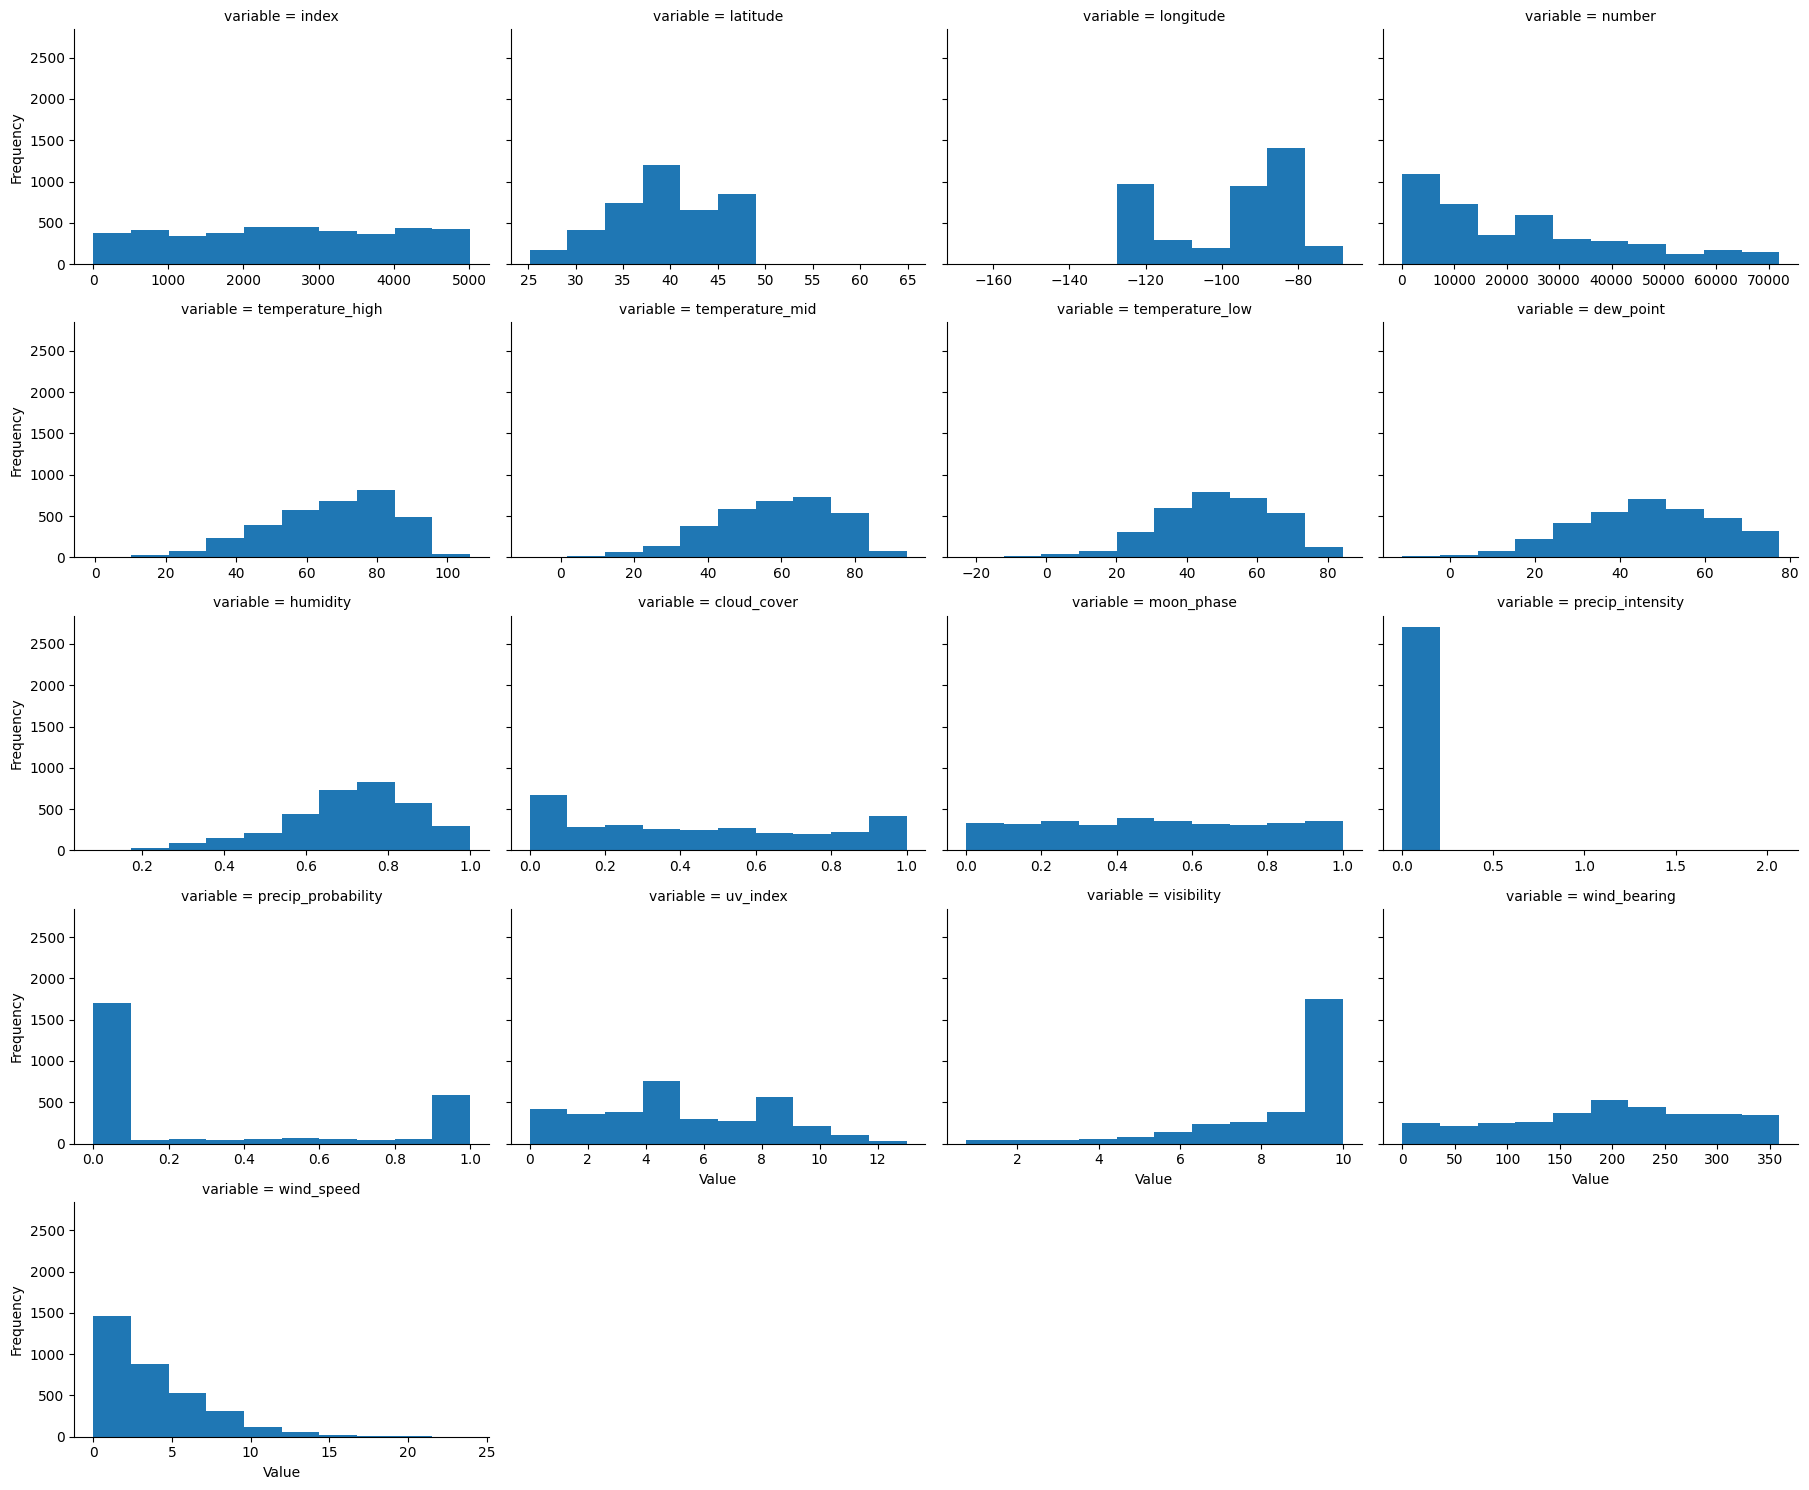

In [39]:
numerical_columns = bigfoot_df.select_dtypes(include=['int64', 'float64']).columns

melted_df = pd.melt(bigfoot_df, value_vars=numerical_columns)

facet_hist = sns.FacetGrid(melted_df, col='variable', sharex = False, sharey = True, margin_titles=True, aspect=1.5, col_wrap=4)
facet_hist.map(plt.hist, 'value')
facet_hist.set_axis_labels('Value', 'Frequency')
plt.show()

In [40]:
bigfoot_df_10yrs = bigfoot_df[(bigfoot_df['date'] >= '2000-01-01')
                     & (bigfoot_df['date'] < '2023-01-01')]


bigfoot_df_10yrs.describe()

,index,latitude,longitude,date,number,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,uv_index,visibility,wind_bearing,wind_speed
count,2526.000000,2526.000000,2526.000000,2526,2526.000000,2434.000000,2417.000000,2418.000000,2432.000000,2432.000000,2144.000000,2439.000000,2222.000000,2220.000000,2435.000000,2158.000000,2433.000000,2435.000000
mean,2566.182502,39.296818,-96.871235,2008-10-12 03:40:37.054631680,28003.999208,66.217182,57.110474,47.998573,45.291801,0.705987,0.410159,0.500467,0.005932,0.294635,5.018070,8.602278,197.673243,3.218838
min,7.000000,25.141000,-167.131000,2000-01-01 00:00:00,76.000000,-0.620000,-8.455000,-22.780000,-11.210000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.740000,0.000000,0.000000
25%,1348.250000,35.056910,-114.004825,2004-07-05 18:00:00,10906.250000,53.647500,45.695000,36.915000,33.357500,0.620000,0.100000,0.260000,0.000000,0.000000,2.000000,7.982500,131.000000,1.060000
50%,2569.500000,39.212070,-91.574165,2007-09-12 00:00:00,25443.500000,68.510000,58.410000,48.765000,45.530000,0.730000,0.360000,0.490000,0.000000,0.000000,5.000000,9.600000,205.000000,2.310000
75%,3865.750000,43.897607,-83.003235,2012-11-08 12:00:00,42106.000000,80.580000,69.825000,59.925000,58.432500,0.830000,0.690000,0.750000,0.001500,0.700000,8.000000,10.000000,272.000000,4.510000
max,5015.000000,64.891390,-68.228300,2021-11-27 00:00:00,71997.000000,106.510000,94.030000,84.340000,77.400000,1.000000,1.000000,1.000000,2.069000,1.000000,13.000000,10.000000,359.000000,23.940000
std,1439.426823,5.788921,16.554573,NaN,19414.827562,18.036166,16.500398,15.911918,16.754166,0.165179,0.331403,0.287323,0.054972,0.410009,3.290708,2.076682,95.114624,2.921229


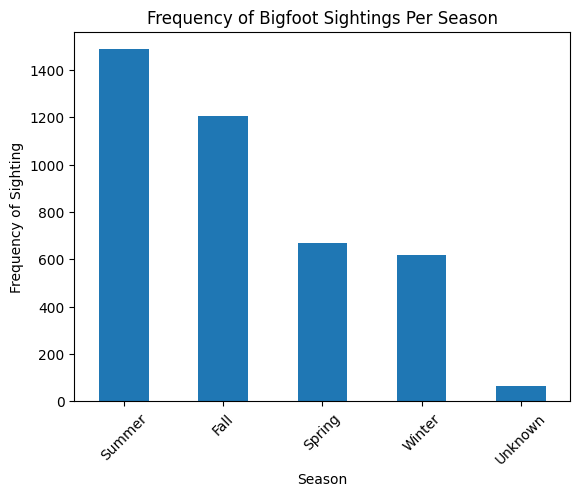

In [41]:
# Plot frequency of sightings in each seasons
seasons_freq = bigfoot_df['season'].value_counts()
seasons_freq.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Frequency of Sighting')
plt.title('Frequency of Bigfoot Sightings Per Season')
plt.xticks(rotation=45)
plt.show;

In [42]:
# import scipy.stats
# from scipy.stats import f_oneway
# # Create a list to store the data for each season
# data = []
# for season, count in seasons_freq.items():
#     data.append(bigfoot_df[bigfoot_df['season'] == season]['season'])

# # Perform ANOVA
# f_statistic, p_value = f_oneway(*data)

# # Output the result
# print("F-statistic:", f_statistic)
# print("p-value:", p_value)


In [43]:
bigfoot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4045 entries, 2 to 5015
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               4045 non-null   int64         
 1   observed            4012 non-null   object        
 2   county              4045 non-null   object        
 3   state               4045 non-null   object        
 4   season              4045 non-null   object        
 5   title               4045 non-null   object        
 6   latitude            4045 non-null   float64       
 7   longitude           4045 non-null   float64       
 8   date                4045 non-null   datetime64[ns]
 9   number              4045 non-null   int64         
 10  classification      4045 non-null   object        
 11  geohash             4045 non-null   object        
 12  temperature_high    3338 non-null   float64       
 13  temperature_mid     3186 non-null   float64       
 1

In [44]:
# Import statements!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [45]:
# bigfoot_df = bigfoot_df[bigfoot_df['latitude'] >= 25]
# bigfoot_df = bigfoot_df[bigfoot_df['latitude'] <= 50]



In [46]:
# Explanatory variables
X   = bigfoot_df[['temperature_high', 'temperature_mid', 'temperature_low', 'longitude']]
# Target variable
y   = bigfoot_df['latitude']

# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    test_size=0.3, 
                                                    random_state=7,
                                                   ) # no stratify bc tip amount is continuous

# Random forest regression
dt = RandomForestRegressor(random_state=7)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))
print('The R2 of the model is: {}'.format(r2))

The mse of the model is: 17.63925168104764
The R2 of the model is: 0.45164032961963463


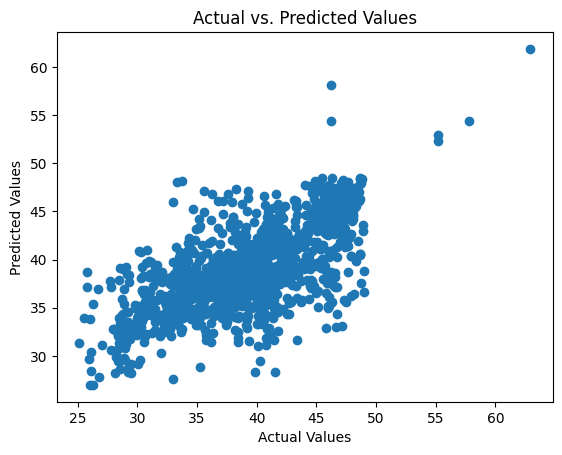

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [49]:
bigfoot_df_2 = bigfoot_df.dropna(subset = ['temperature_low', 'temperature_mid', 'temperature_high', 'date'])
bigfoot_df_2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3186 entries, 2 to 5015
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               3186 non-null   int64         
 1   observed            3163 non-null   object        
 2   county              3186 non-null   object        
 3   state               3186 non-null   object        
 4   season              3186 non-null   object        
 5   title               3186 non-null   object        
 6   latitude            3186 non-null   float64       
 7   longitude           3186 non-null   float64       
 8   date                3186 non-null   datetime64[ns]
 9   number              3186 non-null   int64         
 10  classification      3186 non-null   object        
 11  geohash             3186 non-null   object        
 12  temperature_high    3186 non-null   float64       
 13  temperature_mid     3186 non-null   float64       
 1

In [50]:

# Extract month, day, and year into separate columns
bigfoot_df_2['month'] = bigfoot_df_2['date'].dt.month
bigfoot_df_2['day'] = bigfoot_df_2['date'].dt.day
bigfoot_df_2['year'] = bigfoot_df_2['date'].dt.year
bigfoot_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3186 entries, 2 to 5015
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               3186 non-null   int64         
 1   observed            3163 non-null   object        
 2   county              3186 non-null   object        
 3   state               3186 non-null   object        
 4   season              3186 non-null   object        
 5   title               3186 non-null   object        
 6   latitude            3186 non-null   float64       
 7   longitude           3186 non-null   float64       
 8   date                3186 non-null   datetime64[ns]
 9   number              3186 non-null   int64         
 10  classification      3186 non-null   object        
 11  geohash             3186 non-null   object        
 12  temperature_high    3186 non-null   float64       
 13  temperature_mid     3186 non-null   float64       
 1

/var/folders/t8/7j72z1zx6ps97nwc1n_h8ldr0000gn/T/ipykernel_5147/3855306864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigfoot_df_2['month'] = bigfoot_df_2['date'].dt.month
/var/folders/t8/7j72z1zx6ps97nwc1n_h8ldr0000gn/T/ipykernel_5147/3855306864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigfoot_df_2['day'] = bigfoot_df_2['date'].dt.day
/var/folders/t8/7j72z1zx6ps97nwc1n_h8ldr0000gn/T/ipykernel_5147/3855306864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [84]:
# Explanatory variables
feat_list = ['month', 'longitude', 'latitude', 'visibility']
bigfoot_df_2 = bigfoot_df_2.dropna(subset = feat_list)
X   = bigfoot_df_2[feat_list]

# Target variable
y   = bigfoot_df_2['classification']

# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    test_size=0.3, 
                                                    random_state=7,
                                                    stratify = y
                                                   ) # no stratify bc tip amount is continuous

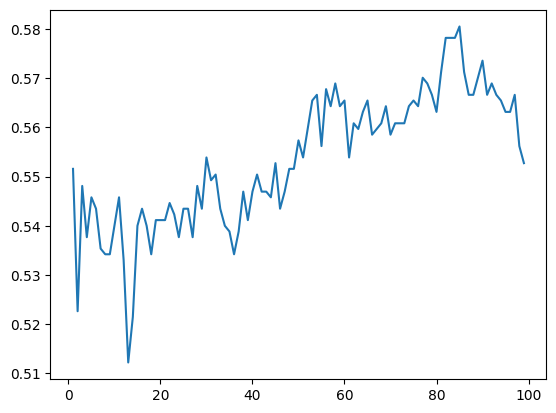

In [85]:
# Try different values of k and evaluate for accuracy on training set
predictions = {}
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)

sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.show()

In [86]:
knn = KNeighborsClassifier(n_neighbors = 86)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

target_names = ['Class A', 'Class B']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class A       0.56      0.60      0.58       422
     Class B       0.59      0.54      0.56       441

    accuracy                           0.57       863
   macro avg       0.57      0.57      0.57       863
weighted avg       0.57      0.57      0.57       863



In [ ]:
# Set params
params = {'C': np.arange(1, 10),
         'gamma': np.arange(1, 5)}

# Create model and use GridSeatch
svm = SVC()
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5, return_train_score = True) 
svm_grid.fit(X_train, y_train)

print(svm_grid.best_params_)
print(svm_grid.best_score_)

In [ ]:
# Display the results 
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()
# Shows variance and bias

## Algorithm 2: Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
bigfoot_df_2 = bigfoot_df_2[bigfoot_df_2['classification'].isin(['Class A', 'Class B'])]

# Explanatory variables
feat_list = ['month', 'longitude', 'latitude', 'visibility']
bigfoot_df_2 = bigfoot_df_2.dropna(subset = feat_list)
X   = bigfoot_df_2[feat_list]

# Target variable
y   = bigfoot_df_2['classification']

# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    test_size=0.3, 
                                                    random_state=7,
                                                    stratify = y
                                                   ) # no stratify bc tip amount is continuous
dt = DecisionTreeClassifier(max_depth = 3, criterion='entropy', random_state=7)
dt.fit(X_train, y_train)   
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5492468134414832

In [82]:
target_names = ['Class A', 'Class B']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class A       0.56      0.35      0.43       422
     Class B       0.54      0.74      0.63       441

    accuracy                           0.55       863
   macro avg       0.55      0.55      0.53       863
weighted avg       0.55      0.55      0.53       863



In [ ]:
# Set params
params = {'C': np.arange(1, 10),
         'gamma': np.arange(1, 5)}

# Create model and use GridSeatch
svm = SVC()
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5, return_train_score = True) 
svm_grid.fit(X_train, y_train)

print(svm_grid.best_params_)
print(svm_grid.best_score_)

In [ ]:
# Display the results 
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()
# Shows variance and bias

# Algorithm 3: SVM

In [67]:
# Filter to only Class A or Class B
bigfoot_df_3 = bigfoot_df_2[bigfoot_df_2['classification'].isin(['Class A', 'Class B'])]

# Define Explanatory variables and further remove NAs
feat_list = ['month', 'longitude', 'latitude', 'visibility']
bigfoot_df_3 = bigfoot_df_3.dropna(subset = feat_list)
X   = bigfoot_df_3[feat_list]

# Define target variable
y   = bigfoot_df_3['classification']

# Partition the 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    test_size=0.3, 
                                                    random_state=7,
                                                    stratify = y
                                                   )

scaler = StandardScaler()
scaler.fit(X_train[feat_list])
X_train[feat_list] = scaler.transform(X_train[feat_list]) #scale the training data
X_train.head(10)

,month,longitude,latitude,visibility
4657,0.891933,0.370351,-0.194555,0.101099
4644,-1.948161,0.439143,0.517985,-1.809094
2456,-1.948161,-1.697012,1.378961,0.011559
2345,1.523065,0.959390,-0.375221,0.737830
2789,1.207499,-1.651362,1.235304,0.036431
3873,-0.054765,-1.532261,-0.076761,-3.042760
2225,1.523065,-0.887255,0.224304,0.653264
4972,-1.948161,0.798879,-0.205913,0.543826
2696,-0.370331,-1.587190,1.335574,-2.724395
263,-0.054765,-0.822162,-0.550014,0.737830


In [68]:
# Initialize the model
svm = SVC()
svm.fit(X_train, y_train)

# Scale the data
X_test[feat_list] = scaler.transform(X_test[feat_list])
y_pred   = svm.predict(X_test)

print('The predicted class is: {}'.format(y_pred))

The predicted class is: ['Class A' 'Class A' 'Class A' 'Class B' 'Class A' 'Class A' 'Class A'
 'Class A' 'Class B' 'Class B' 'Class A' 'Class B' 'Class B' 'Class B'
 'Class B' 'Class A' 'Class A' 'Class B' 'Class A' 'Class B' 'Class A'
 'Class A' 'Class A' 'Class A' 'Class B' 'Class B' 'Class A' 'Class B'
 'Class B' 'Class B' 'Class A' 'Class B' 'Class A' 'Class A' 'Class B'
 'Class A' 'Class A' 'Class A' 'Class B' 'Class A' 'Class A' 'Class A'
 'Class A' 'Class B' 'Class A' 'Class B' 'Class A' 'Class B' 'Class A'
 'Class A' 'Class A' 'Class A' 'Class A' 'Class A' 'Class B' 'Class B'
 'Class A' 'Class A' 'Class A' 'Class B' 'Class B' 'Class A' 'Class B'
 'Class A' 'Class A' 'Class A' 'Class B' 'Class B' 'Class A' 'Class A'
 'Class A' 'Class B' 'Class A' 'Class A' 'Class A' 'Class B' 'Class A'
 'Class A' 'Class B' 'Class B' 'Class B' 'Class A' 'Class A' 'Class A'
 'Class B' 'Class A' 'Class B' 'Class B' 'Class A' 'Class A' 'Class A'
 'Class B' 'Class B' 'Class A' 'Class B' 'Class B' 'C

In [69]:
print('The accuracy of the model is: {}'.format(svm.score(X_test, y_test)))

The accuracy of the model is: 0.5527230590961761


In [72]:
# Set params
params = {'C': np.arange(1, 10),
         'gamma': np.arange(1, 5)}

# Create model and use GridSeatch
svm = SVC()
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5, return_train_score = True) 
svm_grid.fit(X_train, y_train)

print(svm_grid.best_params_)
print(svm_grid.best_score_)

{'C': 1, 'gamma': 1}
0.5464772909645321


In [73]:
# Display the results 
cv_results = pd.DataFrame(svm_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()
# Shows variance and bias

,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.645202,0.006676,0.546477,0.021703
4,0.665714,0.006520,0.534552,0.011590
8,0.676902,0.006855,0.533058,0.012874
1,0.695797,0.005322,0.533056,0.018735
2,0.734956,0.010790,0.532559,0.021171
